# Using the QPU

In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
%matplotlib inline

## Example: Quantum Calculator

In this notebook we define write a quantum calculator for binary addition and run it on the real QPU.

The truth table for binary aiddtion of two-qubits reads: 

<div>
    <table style="width:400px">
      <tr>
        <th colspan="2">Input</th>
        <th>Output</th>
      </tr>
      <tr>
        <th>q1</th>
        <th>q2</th>
        <th>$\psi$</th>
      </tr>
      <tr>
        <td>$|0\rangle$</td>
        <td>$|0\rangle$</td>
        <td>$|00\rangle$</td>
      </tr>
      <tr>
        <td>$|0\rangle$</td>
        <td>$|1\rangle$</td>
        <td>$|01\rangle$</td>
      </tr>
      <tr>
        <td>$|1\rangle$</td>
        <td>$|0\rangle$</td>
        <td>$|01\rangle$</td>
      </tr>
      <tr>
        <td>$|1\rangle$</td>
        <td>$|1\rangle$</td>
        <td>$|10\rangle$</td>
      </tr>
    </table>
</div>

First, let us define a quantum circuit that takes to input qubits and calculates their binary sum.

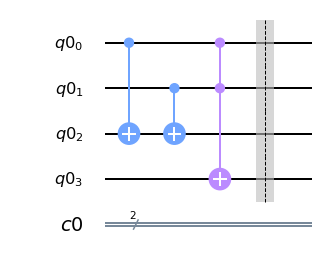

In [2]:
# define a quantum circuit for two-qubit addition
q = QuantumRegister(4)
c = ClassicalRegister(2)
additionqc = QuantumCircuit(q, c)

additionqc.cx(q[0], q[2])
additionqc.cx(q[1], q[2])
additionqc.ccx(q[0], q[1], q[3])
additionqc.barrier()

additionqc.draw(output='mpl')

In [3]:
# Define the input circuit
# In this example let us set both input qubits to 1 by applying a X gate
inqc = QuantumCircuit(q, c)
inqc.x(q[0])
inqc.x(q[1])
inqc.barrier()

In [4]:
# Define the output circuit
outqc = QuantumCircuit(q, c)
outqc.measure(q[2],c[0])
outqc.measure(q[3],c[1])

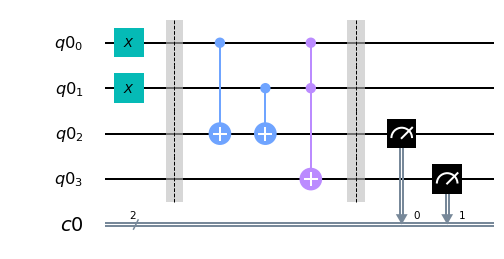

In [5]:
# define full Quantum Circuit for 
# the addition of two qubits in state 1
qc = inqc + additionqc + outqc
qc.draw(output='mpl')

## Running circuits from the IBM Q account <a name='ibmq'></a>

To facilitate access to real quantum computing hardware, we have provided a simple API interface.
To access IBM Q devices, you'll need an API token. You can generate, or view, your API token [here](https://quantum-computing.ibm.com/account) (create an account if you don't already have one).

Your IBM Q account lets you run your circuit on real devices or on our cloud simulator. Basic account usage can be seen in the examples below. For more detailed instructions on using the IBM Q account, see [Part 3: The IBMQ Account](3_the_ibmq_account.ipynb).

In [6]:
from qiskit import IBMQ

After generating your API token, call: `IBMQ.save_account('MY_TOKEN')`.

This will store your IBM Q credentials in a local file.  Unless your registration information has changed, you only need to do this once.  You may now load your accounts by calling,

In [7]:
MY_TOKEN = '916a57af3175bd744bd9e8ad34bd84369e96a702dc28af96e9153a85c82bbcb03535532e388d00151b3042b5425f1dd9075a6d32ca5a09d1738e42e401e6e76f'
IBMQ.enable_account(token=MY_TOKEN)

/opt/conda/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Once your account has been loaded, you have one or more providers available to you

In [8]:
#IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

Each provider gives access to a selection of services (e.g. Backends) that is authorized by your account.  To see the backends available to a given provider, first select the provider by hub, group, project, or a combination thereof:

In [9]:
provider = IBMQ.get_provider(group='open')

then ask the provider to list its backends:

In [10]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

### Running circuits on real devices

Today's quantum information processors are small and noisy, but are advancing at a fast pace. They provide a great opportunity to explore what [noisy, intermediate-scale quantum (NISQ)](https://arxiv.org/abs/1801.00862) computers can do.

Now grab a backend from the provider on which to run our quantum circuit:

In [11]:
backend = provider.get_backend('ibmq_burlington')

Let us get some information about the backend. For example the chip layout.

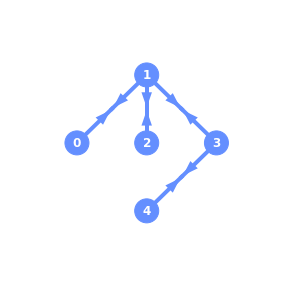

In [12]:
plot_gate_map(backend, plot_directed=True)

So we have a QPU with 5 Qubits. Let us check which gates are supported by this backend

In [13]:
backend.configuration().basis_gates

['u1', 'u2', 'u3', 'cx', 'id']

Lets compare that with our Quantum Circuit

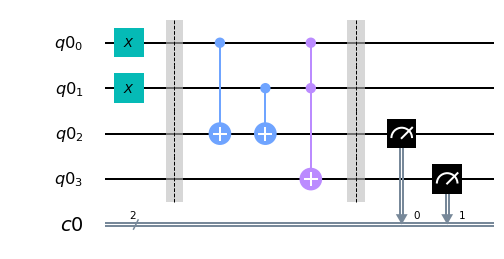

In [14]:
qc.draw(output='mpl')

Well... except for the CNOT gate, the basis gates of the hardware are totaly different gates than we have in our circuit! But, worry not, it is quite commmon to have such reduced basis gate sets for the real physical hardware. Therefore, the gates we use in our algorithm get decomposed into these supported basis set. This step is done using the **transpiler**.

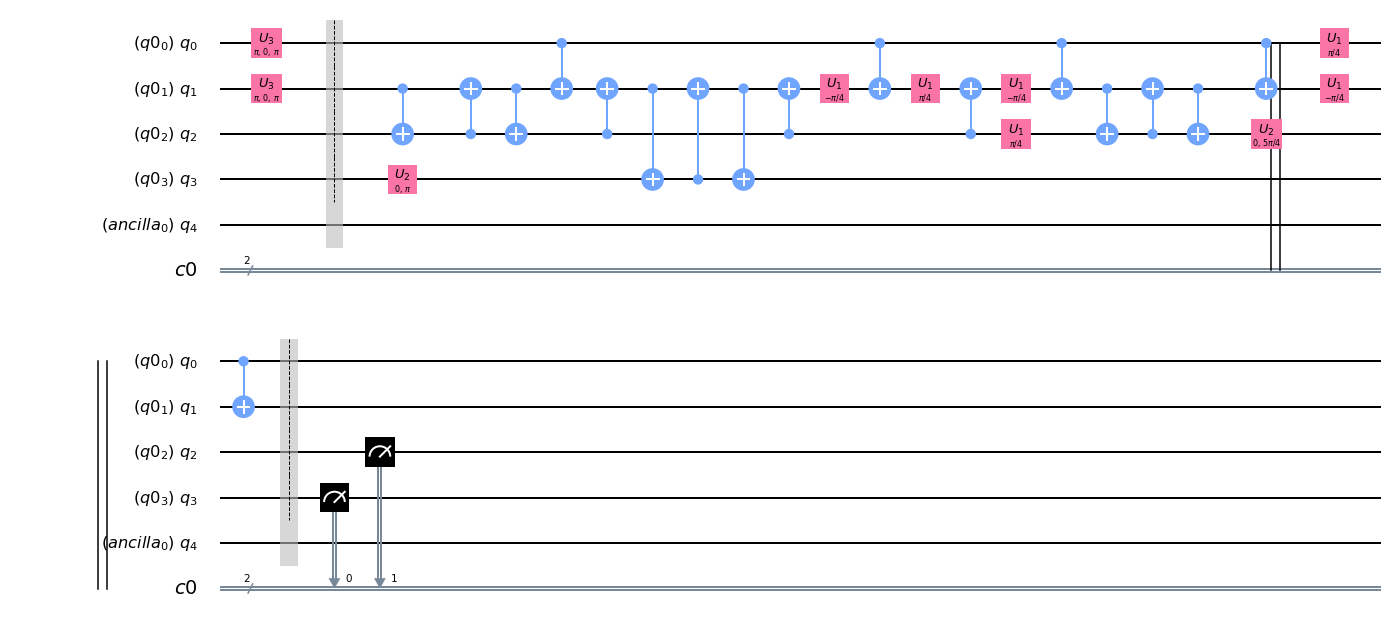

In [15]:
transpiler = transpile(qc, backend)
transpiler.draw(output='mpl')

Obviously we need a lot more gates on the real hardware compared to our algorithm! 
Let us compare the circuit depth

In [16]:
qc.depth(), transpiler.depth()

(5, 23)

The algorithm that gets run on the QPU is much larger than we would have guessed from our algorithm! Keep in mind that, the longer our algorithm the more errors and noise we have to expect for our measurement!

Having the transpiled quantum circuit we can now _run_ the job on the real hardware. However, it is more convenient to use the `execute` command. This command automatically performs the _transpile_ and _run_ step.

In [17]:
from qiskit.tools.monitor import job_monitor

job_exp = execute(qc, backend=backend, shots=5000)
job_monitor(job_exp)

Job Status: job has successfully run


In [18]:
result_exp = job_exp.result()

Like before, the counts from the execution can be obtained using ```get_counts()``` 

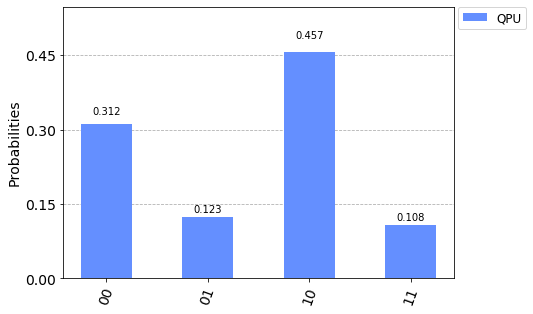

In [19]:
counts_exp = result_exp.get_counts()
plot_histogram([counts_exp], legend=['QPU'])

Well, that is not entirely what we expected... Any idea why?
Let us the simulator to see if we run the correct circuit.

### Simulating circuits using the IBM Q cloud simulator

The IBM Q provider also comes with a remote optimized simulator called ``ibmq_qasm_simulator``. This remote simulator is capable of simulating up to 32 qubits. It can be used the same way as the remote real backends. 

In [20]:
simulator_backend = provider.get_backend('ibmq_qasm_simulator')

In [21]:
job_cloud = execute(qc, backend=simulator_backend)

In [22]:
result_cloud = job_cloud.result()

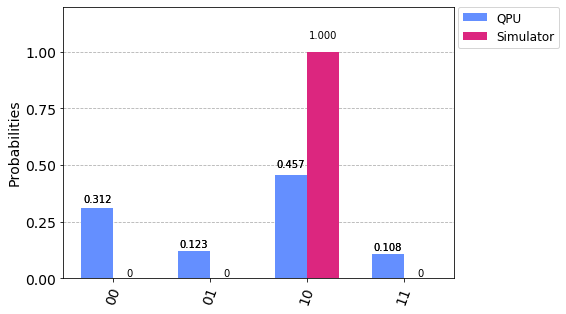

In [23]:
counts_cloud = result_cloud.get_counts()
plot_histogram([counts_exp, counts_cloud], legend=['QPU', 'Simulator'])

Brilliant! In the simulator we have obtained the result $10$ which is the binary expression for $2$. Hence we have succesfully calculated the famous mathematical equation $1+1=2$.

### Retrieving a previously run job

If your experiment takes longer to run then you have time to wait around, or if you simply want to retrieve old jobs, the IBM Q backends allow you to do that.
First, you would need to note your job's ID:

In [24]:
job_id = job_exp.job_id()

print('JOB ID: {}'.format(job_id))

JOB ID: 5e24ac0f94aea30018bf9eb2


Given a job ID, that job object can be later reconstructed from the backend using ```retrieve_job```:

In [25]:
retrieved_job = backend.retrieve_job(job_id)

and then the results can be obtained from the new job object. 

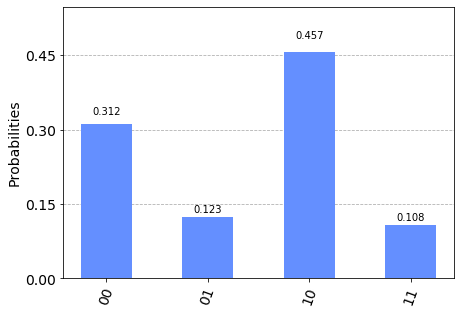

In [26]:
plot_histogram(retrieved_job.result().get_counts(qc))

# General Workflow

1. Build
    1. Setup a **Quantum Circuit** acting on Quantum and Classical **registers**
    2. Add **Quantum Gates** for your algorithm
    3. Add **Measurements**
2. Execute
    1. Choose **Backend** from provider
    2. **Execute** the circuit on the backend
3. **Analyze**: calculate summary statistics and visualize the results 

# Exercise

1. In the above circuit we solved the addition $1+1=2$. How would we need to modify our circuit in order to calculate all possible two qubit sums?

2. Build a Quantum Circuit for a random number generator that generates a random 3-bit sequence.
Excute the circuit in the Qasm Simulator and on the real QPU and compare the results.

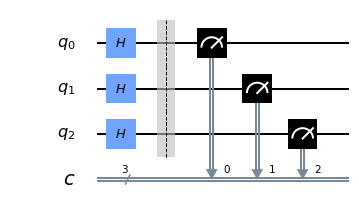

In [27]:
# Create single Qubit Circuit
def random_number(n_qubits):
    q = QuantumRegister(n_qubits, 'q')
    c = ClassicalRegister(n_qubits, 'c')
    qc = QuantumCircuit(q,c)
    
    qc.h(q)
    qc.barrier()
    qc.measure(q, c)
    
    return qc

qc = random_number(3)
qc.draw(output='mpl')

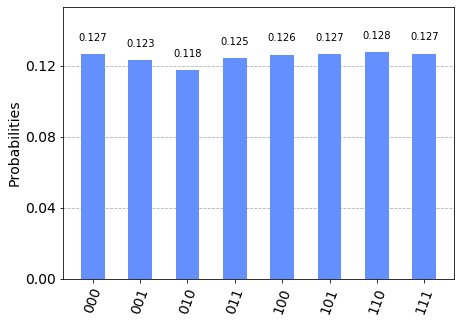

In [28]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
counts_sim = job.result().get_counts()
plot_histogram(counts_sim)

In [29]:
# Use QPU
backend = provider.get_backend('ibmq_burlington')
job = execute(qc, backend, shots=8192)
job_monitor(job)

Job Status: job has successfully run


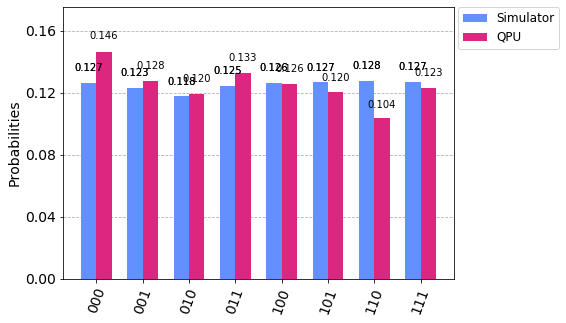

In [30]:
# retreive results and compare
counts_qpu = job.result().get_counts()
plot_histogram([counts_sim, counts_qpu], legend=['Simulator', 'QPU'])